#IMPORTING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

import string
from sklearn.utils import resample
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

import nltk
from nltk.corpus import stopwords

import re
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#nltk stopwords download

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#DATASET LOADING


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movie dataset/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Sentiment counts


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#DATASET ANALYSIS


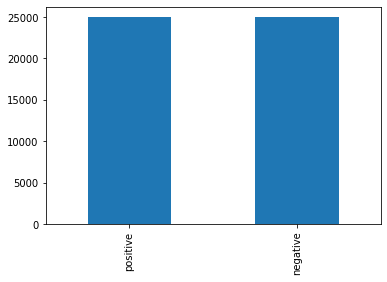

In [ ]:
df['sentiment'].value_counts().plot(kind = 'bar', label = ('Positive', "Negative"))


 Taking a subset from entire dataset

In [ ]:
sample = 10000 #  <-- ekhane joto diba oto gular subset hobe
data_positive = df[(df['sentiment']=='positive')]
data_negative = df[(df['sentiment']=='negative')]
data_positive_new = resample(data_positive, replace = True, n_samples = sample//2, random_state = 42)
data_negative_new = resample(data_negative, replace = True, n_samples = sample//2, random_state = 42)

df = pd.concat([data_positive_new,data_negative_new]).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,review,sentiment
0,Powers Boothe turns in a stellar performance a...,positive
1,Emilio Estevez actually directed a good movie-...,positive
2,What will be Prospero in the twentieth century...,positive
3,That's a problem I have with movies that come ...,negative
4,Stumbled over this film on Amazon.com. Had nev...,negative


Sentiment count from sub dataset

In [ ]:
df['sentiment'].value_counts()

positive    5000
negative    5000
Name: sentiment, dtype: int64

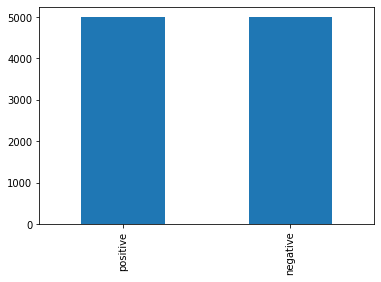

In [ ]:
df['sentiment'].value_counts().plot(kind = 'bar', label = ('Positive', "Negative"))

In [ ]:
data_positive_new.review

47296    It gives the ordinary guy/girl the chance to b...
31574    First things first, Edison Chen did a fantasti...
1685     It's unbelievable but the fourth is better tha...
10767    The Thing has to be one of the all time great ...
43116    This movie had it all,action,comedy,heroics,an...
                               ...                        
37886    A notorious big budget flop when released. Thi...
5584     The largest crowd to ever see a wrestling even...
45379    I don't cry easily over movies, but I have to ...
12066    If you repeat a lie enough number of times wil...
21225    "Hollywood Hotel" has relationships to many fi...
Name: review, Length: 5000, dtype: object

#WordCloud

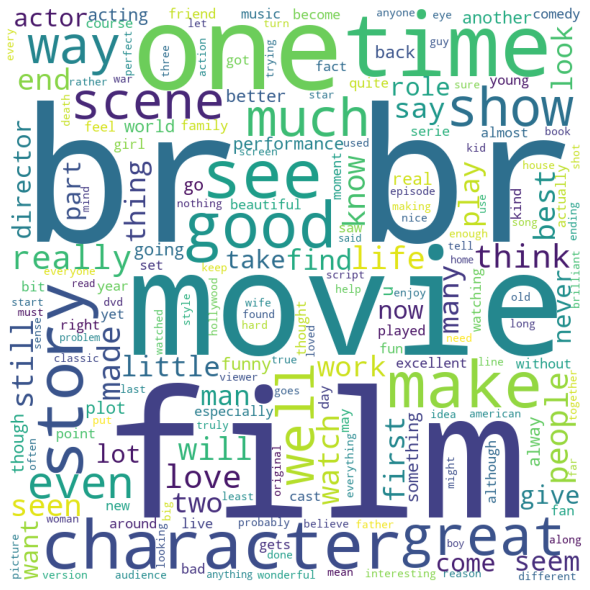

In [ ]:
comment_words = ''
stopMyWords = set(STOPWORDS)
 
# iterate through the csv file
for val in data_positive_new.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopMyWords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

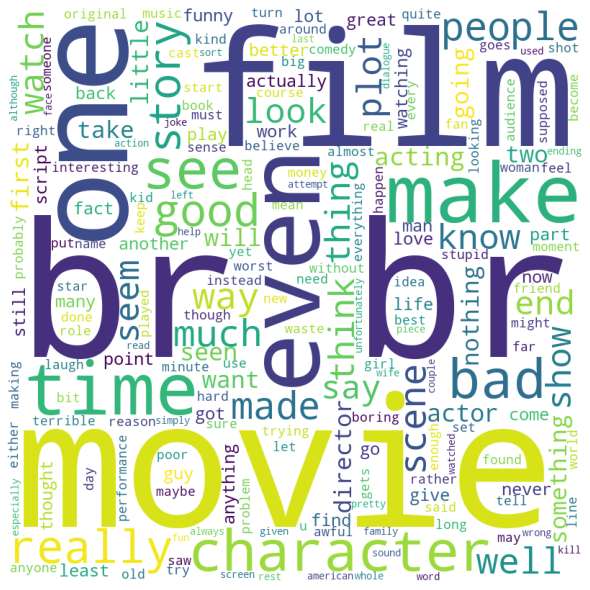

In [ ]:
comment_words = ''
stopMyWords = set(STOPWORDS)
 
# iterate through the csv file
for val in data_negative_new.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopMyWords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#LABEL ENCODING


In [ ]:
def label_encoder(x):
    if x == 'positive': 
      return 1
    elif x == 'negative': 
      return 0

df['sentiment'] = df.sentiment.apply(lambda x: label_encoder(x))    
df.head()

,review,sentiment
0,I thought that this movie was going to be tota...,1
1,"With all of its technical flash, the 1993 ""Sta...",0
2,Vonnegut's words are best experienced on paper...,1
3,Here's a rare gem for those of you that haven'...,1
4,<br /><br />I used to like some of the Hollywo...,0


#Data Preprocessing



1. Stemming
2. Clean text 
3. Remove punctuations
4. Digram TFIDF

In [ ]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
df.head()

,review,sentiment
0,I thought that this movie was going to be tota...,1
1,"With all of its technical flash, the 1993 ""Sta...",0
2,Vonnegut's words are best experienced on paper...,1
3,Here's a rare gem for those of you that haven'...,1
4,<br /><br />I used to like some of the Hollywo...,0


In [ ]:
def clean_text(x):
    x = re.sub(r'https?://\S+', '', x) 
    x = re.sub(r'#\w+', '', x) 
    x = re.sub(r'\n',' ',x) 
    x = re.sub('\s+', ' ', x).strip()
    x = re.sub('\.','',x) 
    
    return x.lower()
df['review'] = df.review.apply(lambda x: clean_text(x))
df.head()

,review,sentiment
0,i thought that this movie was going to be tota...,1
1,"with all of its technical flash, the 1993 ""sta...",0
2,vonnegut's words are best experienced on paper...,1
3,here's a rare gem for those of you that haven'...,1
4,<br /><br />i used to like some of the hollywo...,0


In [ ]:
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

df['review'] = df.review.apply(lambda x: remove_punctuation(x))
df.head()

,review,sentiment
0,i thought that this movie was going to be tota...,1
1,with all of its technical flash the 1993 stali...,0
2,vonneguts words are best experienced on paper ...,1
3,heres a rare gem for those of you that havent ...,1
4,br br i used to like some of the hollywood act...,0


In [ ]:
def pre_process_text(df):
    stop = stopwords.words('english')
    df['clean_review'] = df['review'].apply(lambda x: clean_text(x))
    df['clean_review'] = df['clean_review'].apply(stemming)
    df['clean_review_without_stopword'] = df['clean_review'].apply(lambda x:' '.join([word for word in x.split() if word not in stop]))
    df['Final Output'] = df['clean_review_without_stopword']
    return df

df.head()

,review,sentiment
0,i thought that this movie was going to be tota...,1
1,with all of its technical flash the 1993 stali...,0
2,vonneguts words are best experienced on paper ...,1
3,heres a rare gem for those of you that havent ...,1
4,br br i used to like some of the hollywood act...,0


In [ ]:
pdf = pre_process_text(df)
pdf

,review,sentiment,clean_review,clean_review_without_stopword,Final Output
0,i thought that this movie was going to be tota...,1,thought movi go total lame base advertis saw t...,thought movi go total lame base advertis saw t...,thought movi go total lame base advertis saw t...
1,with all of its technical flash the 1993 stali...,0,technic flash stalingrad movi disappoint watch...,technic flash stalingrad movi disappoint watch...,technic flash stalingrad movi disappoint watch...
2,vonneguts words are best experienced on paper ...,1,vonnegut word best experienc paper tale weav g...,vonnegut word best experienc paper tale weav g...,vonnegut word best experienc paper tale weav g...
3,heres a rare gem for those of you that havent ...,1,here rare gem havent seen like even heard denn...,rare gem havent seen like even heard denni qua...,rare gem havent seen like even heard denni qua...
4,br br i used to like some of the hollywood act...,0,br br use like hollywood action blockbust icon...,br br use like hollywood action blockbust icon...,br br use like hollywood action blockbust icon...
...,...,...,...,...,...
9995,a documentarist like any filmmaker must convey...,0,documentarist like filmmak must convey compel ...,documentarist like filmmak must convey compel ...,documentarist like filmmak must convey compel ...
9996,i thought that one dark night was great it des...,1,thought one dark night great deserv statement ...,thought one dark night great deserv statement ...,thought one dark night great deserv statement ...
9997,to me a matter of life and death is just that ...,1,matter life death simpli best film ever madebr...,matter life death simpli best film ever madebr...,matter life death simpli best film ever madebr...
9998,this film was the recipient of the 1990 academ...,0,film recipi academi award best anim short film...,film recipi academi award best anim short film...,film recipi academi award best anim short film...


#VECTORIZATION

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))
X = tf_idf.fit_transform(df['review'])
Y = df.sentiment


#Dataset spliting 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle = True)
svc = SVC(kernel='rbf', C=1).fit(X_train, Y_train)
y_pred = svc.predict(X_test)

#Implementing Machine Learning Models

1. Logistic Regression
2. Support Vector Machine (SVM)
3. Naive Bayes
4. Random Forest Classifier
5. Decision Tree Classifier

In [ ]:
LR_model = LogisticRegression().fit(X_train,Y_train)

In [ ]:
SVM_model = SVC(kernel='rbf', random_state = 42).fit(X_train, Y_train)

In [ ]:
NB_model = ComplementNB().fit(X_train,Y_train)

In [ ]:
RF_model = RandomForestClassifier(n_estimators= 20, criterion="entropy").fit(X_train, Y_train)

In [ ]:
DCT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1).fit(X_train,Y_train)

#Test sets scores (ML Models)


AxesSubplot(0.125,0.125;0.62x0.755)
[[898 117]
 [ 90 895]]


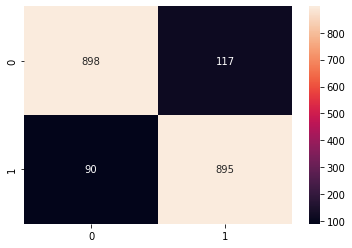

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(confusion, annot=True, fmt="d")
print(ax)
print(confusion)


In [ ]:
LR_score = classification_report(Y_test, LR_model.predict(X_test))
print("MODEL LOGISTIC REGRESSION")
print(LR_score)
SVC_score = classification_report(Y_test, SVM_model.predict(X_test))
print("MODEL SUPPORT VECTOR CLASSIFICATION")
print(SVC_score)
NB_score = classification_report(Y_test, NB_model.predict(X_test))
print("MODEL NAIVE BAYES CLASSIFICATION")
print(NB_score)
RF_score = classification_report(Y_test, RF_model.predict(X_test))
print("MODEL RANDOM FOREST CLASSIFICATION")
print(RF_score)
DC_score = classification_report(Y_test, DCT_model.predict(X_test))
print("MODEL DECSION TREE")
print(DC_score)

MODEL LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1015
           1       0.88      0.90      0.89       985

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

MODEL SUPPORT VECTOR CLASSIFICATION
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1015
           1       0.88      0.91      0.90       985

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

MODEL NAIVE BAYES CLASSIFICATION
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1015
           1       0.95      0.87      0.91       985

    accuracy                           0.91      2000
   macro avg       0.92      0.91

# USING DEEP LEARNING

In [ ]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, GRU
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

#TPU INITIALIZATION


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version 2.8.2
Running on TPU  ['10.13.211.162:8470']


In [ ]:
final_dataset = df.copy()
final_dataset['Final Output'].apply(lambda x:len(str(x).split())).max()

932

In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 1000
EMBEDDING_DIM = 200

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(final_dataset['Final Output'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 50273 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(final_dataset['Final Output'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (10000, 1000)


#Data Spliting


In [ ]:
Y = pd.get_dummies(final_dataset['sentiment']).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of label tensor: (10000, 2)
(9000, 1000) (9000, 2)
(1000, 1000) (1000, 2)


#DL Model

Recurrent Neural Networks (RNNs) -->
[ Bidirectional(LSTM) ]


In [ ]:
with tpu_strategy.scope():
  model = Sequential()
  model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
  model.add(SpatialDropout1D(0.2))
  model.add(Bidirectional(LSTM(300, dropout=0.2, recurrent_dropout=0.2)))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 200)         10000000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 200)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1202400   
 l)                                                              
                                                                 
 dense (Dense)               (None, 300)               180300    
                                                                 
 dense_1 (Dense)             (None, 2)                 602       
                                                                 
Total params: 11,383,302
Trainable params: 11,383,302
No

In [ ]:
epochs = 25
batch_size = 64*tpu_strategy.num_replicas_in_sync
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/25
16/16 [==============================] - 73s 3s/step - loss: 0.6818 - accuracy: 0.5686 - val_loss: 0.6567 - val_accuracy: 0.6900
Epoch 2/25
16/16 [==============================] - 41s 3s/step - loss: 0.5220 - accuracy: 0.8004 - val_loss: 0.5883 - val_accuracy: 0.7167
Epoch 3/25
16/16 [==============================] - 41s 3s/step - loss: 0.3854 - accuracy: 0.8393 - val_loss: 0.5724 - val_accuracy: 0.7233
Epoch 4/25
16/16 [==============================] - 41s 3s/step - loss: 0.1941 - accuracy: 0.9265 - val_loss: 0.5170 - val_accuracy: 0.7811
Epoch 5/25
16/16 [==============================] - 41s 3s/step - loss: 0.0974 - accuracy: 0.9652 - val_loss: 0.6174 - val_accuracy: 0.7944
Epoch 6/25
16/16 [==============================] - 41s 3s/step - loss: 0.0400 - accuracy: 0.9863 - val_loss: 0.6430 - val_accuracy: 0.8122


#Score on DL Model

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 5s 117ms/step - loss: 0.5836 - accuracy: 0.8240
Test set
  Loss: 0.584
  Accuracy: 0.824
